In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
trainset=pd.read_csv('aug_train.csv')
testset=pd.read_csv('aug_test.csv')
submission=pd.read_csv('sample_submission.csv')

In [ ]:
trainset.shape

(19158, 14)

In [ ]:
testset.shape

(2129, 13)

In [ ]:
trainset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
trainset.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
testset.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


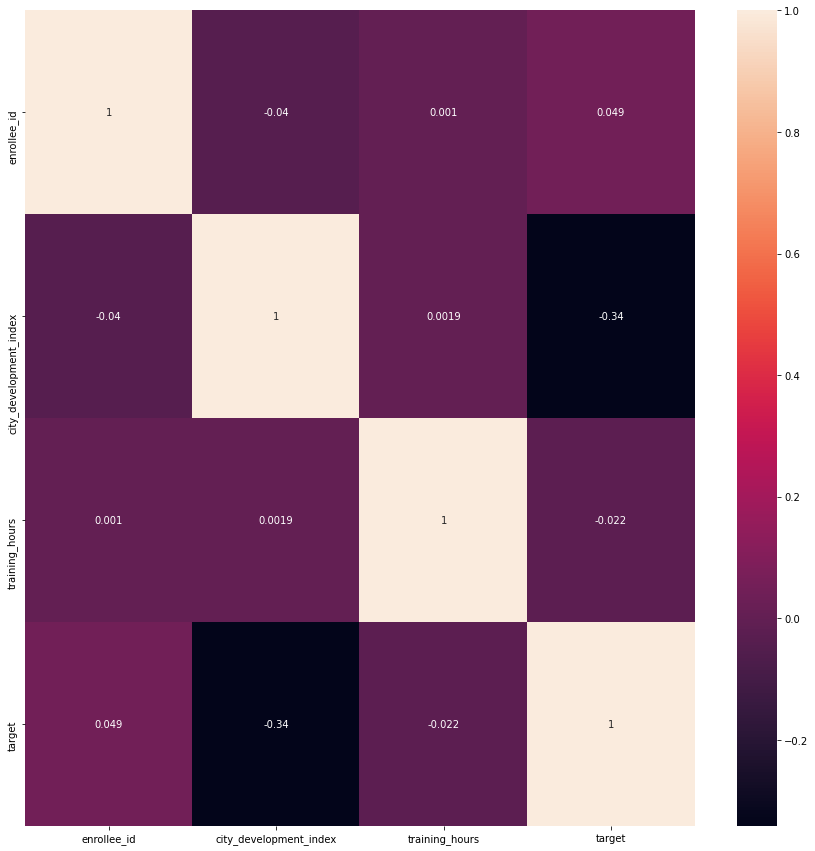

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(trainset.corr(),annot=True)

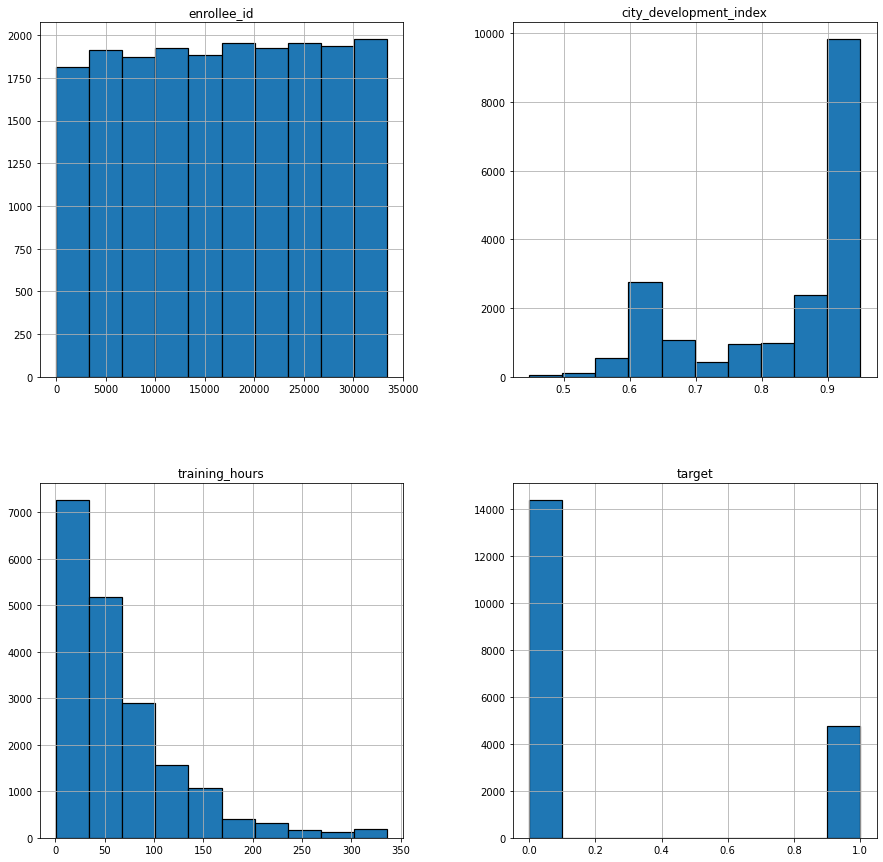

In [ ]:
# Visualizing the distribution for every "feature"
trainset.hist(edgecolor="black", linewidth=1.2, figsize=(15, 15));

Checking for duplicates

In [ ]:
duplicate = trainset[trainset.duplicated()]
duplicate

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [ ]:
trainset.duplicated().sum()

0

Null values

In [ ]:
trainset.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
testset.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

Enrolle_id column

In [ ]:
trainset.drop(['enrollee_id'], axis = 1,inplace=True)
testset.drop(['enrollee_id'], axis = 1,inplace=True)

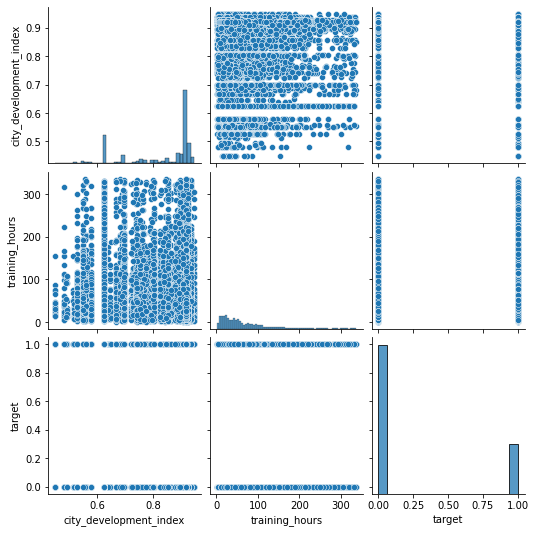

In [ ]:
sns.pairplot(trainset)

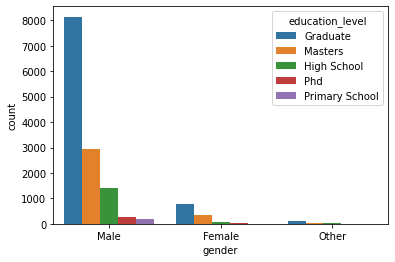

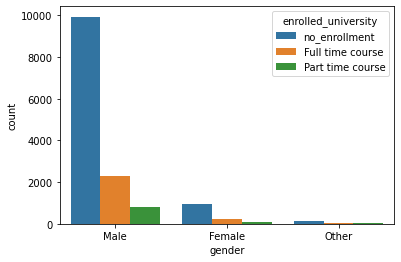

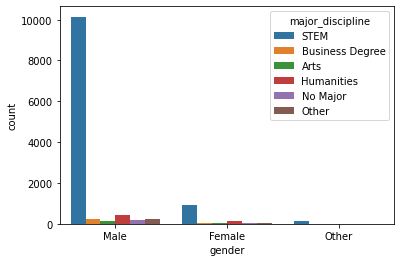

In [ ]:
columns = ['education_level','enrolled_university','major_discipline']
for col in columns:
  sns.countplot(x='gender',hue=col,data=trainset)
  plt.show()

city column

In [ ]:
trainset.value_counts('city')

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Length: 123, dtype: int64

In [ ]:
trainset['city'] = trainset['city'].str[5:]
testset['city'] = testset['city'].str[5:]
trainset.value_counts('city').nlargest(20)

city
103    4355
21     2702
16     1533
114    1336
160     845
136     586
67      431
75      305
102     304
104     301
73      280
100     275
71      266
11      247
90      197
61      197
28      192
23      182
65      175
36      160
dtype: int64

In [ ]:
testset.value_counts('city').nlargest(20)

city
103    473
21     318
16     168
114    155
160    113
136     60
67      39
11      30
75      30
102     30
71      29
104     27
61      24
73      23
28      22
90      22
100     21
65      20
149     18
36      16
dtype: int64

In [ ]:
need = trainset['city'].value_counts().index[:20]
trainset['city'] = np.where(trainset['city'].isin(need), trainset['city'], 'other')

need = testset['city'].value_counts().index[:20]
testset['city'] = np.where(testset['city'].isin(need), testset['city'], 'other')

In [ ]:
trainset= pd.get_dummies(trainset,columns=['city'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['city'], prefix_sep='_', drop_first=True)
trainset.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Gender column

In [ ]:
trainset['gender'].isnull().sum()

4508

In [ ]:
testset['gender'].isnull().sum()

508

In [ ]:
trainset.value_counts('gender')

gender
Male      13221
Female     1238
Other       191
dtype: int64

In [ ]:
testset.value_counts('gender')

gender
Male      1460
Female     137
Other       24
dtype: int64

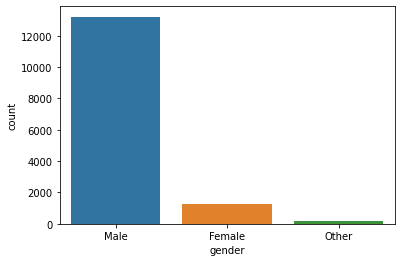

In [ ]:
ax = sns.countplot(x="gender", data=trainset)

In [ ]:
trainset['gender'].fillna('Male',inplace=True)
testset['gender'].fillna('Male',inplace=True)

In [ ]:
trainset= pd.get_dummies(trainset,columns=['gender'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['gender'], prefix_sep='_', drop_first=True)
trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


company_size column

In [ ]:
trainset['company_size'].isnull().sum()

5938

In [ ]:
testset['company_size'].isnull().sum()

622

In [ ]:
trainset.value_counts('company_size')

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
dtype: int64

In [ ]:
testset.value_counts('company_size')

company_size
50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
dtype: int64

In [ ]:
#filling null values
trainset['company_size'] = trainset['company_size'].fillna(pd.Series(np.random.choice(['50-99','100-500','10000+'], size=len(trainset.index))))
testset['company_size'] = testset['company_size'].fillna(pd.Series(np.random.choice(['50-99','100-500','10000+'], size=len(testset.index))))
trainset.value_counts('company_size')

company_size
50-99        5050
100-500      4578
10000+       3983
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
dtype: int64

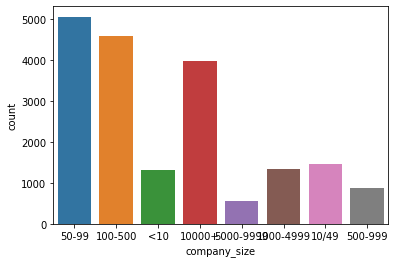

In [ ]:
ax = sns.countplot(x="company_size", data=trainset)

In [ ]:
trainset['company_size']=trainset['company_size'].map({'10/49':1,'50-99': 2,'100-500': 3,'500-999': 4,'1000-4999': 5,'5000-9999': 6,'10000+': 7,'<10': 0})
testset['company_size']=testset['company_size'].map({'10/49':1,'50-99': 2,'100-500': 3,'500-999': 4,'1000-4999': 5,'5000-9999': 6,'10000+': 7,'<10': 0})
trainset.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,2,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,3,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,3,Pvt Ltd,never,52,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,2,Funded Startup,4,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


relevant_experience column

In [ ]:
trainset.value_counts('relevent_experience')

relevent_experience
Has relevent experience    13792
No relevent experience      5366
dtype: int64

In [ ]:
testset.value_counts('relevent_experience')

relevent_experience
Has relevent experience    1524
No relevent experience      605
dtype: int64

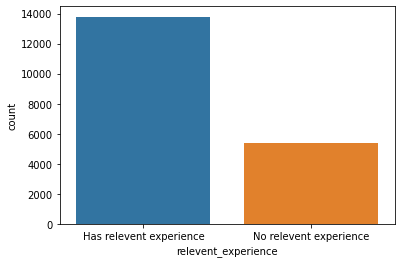

In [ ]:
ax = sns.countplot(x="relevent_experience", data=trainset)

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
trainset['relevent_experience'] = LabelEncoder().fit_transform(trainset['relevent_experience'])
testset['relevent_experience'] = LabelEncoder().fit_transform(testset['relevent_experience'])

In [ ]:
trainset.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other
0,0.920,0,no_enrollment,Graduate,STEM,>20,2,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.776,1,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.624,1,Full time course,Graduate,STEM,5,3,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.789,1,NaN,Graduate,Business Degree,<1,3,Pvt Ltd,never,52,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0.767,0,no_enrollment,Masters,STEM,>20,2,Funded Startup,4,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


enrolled_university column

In [ ]:
trainset['enrolled_university'].isnull().sum()

386

In [ ]:
testset['enrolled_university'].isnull().sum()

31

In [ ]:
trainset.value_counts('enrolled_university')

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
dtype: int64

In [ ]:
testset.value_counts('enrolled_university')

enrolled_university
no_enrollment       1519
Full time course     435
Part time course     144
dtype: int64

In [ ]:
trainset['enrolled_university']=trainset['enrolled_university'].fillna('no_enrollment')
testset['enrolled_university']=testset['enrolled_university'].fillna('no_enrollment')

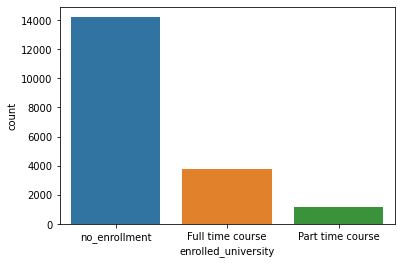

In [ ]:
ax = sns.countplot(x="enrolled_university", data=trainset)

In [ ]:
trainset['enrolled_university']=trainset['enrolled_university'].map({'Part time course':1,'Full time course': 2,'no_enrollment': 0})
testset['enrolled_university']=testset['enrolled_university'].map({'Part time course':1,'Full time course': 2,'no_enrollment': 0})
trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other
0,0.920,0,0,Graduate,STEM,>20,2,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.776,1,0,Graduate,STEM,15,2,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.624,1,2,Graduate,STEM,5,3,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


education_level column

In [ ]:
trainset['education_level'].isnull().sum()

460

In [ ]:
testset['education_level'].isnull().sum()

52

In [ ]:
trainset.value_counts('education_level')

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
dtype: int64

In [ ]:
testset.value_counts('education_level')

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
dtype: int64

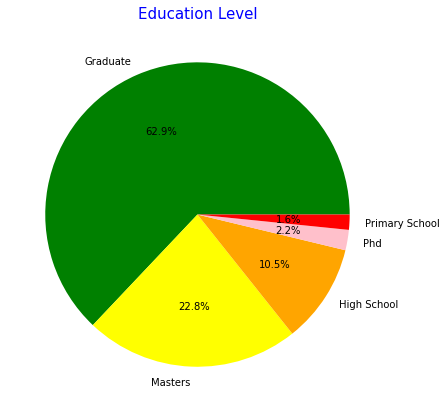

In [ ]:
trainset['education_level']=trainset['education_level'].fillna('Graduate')
testset['education_level']=testset['education_level'].fillna('Graduate')

labels = trainset.education_level.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = trainset.education_level.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Education Level',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
trainset['education_level']=trainset['education_level'].map({'High School':1,'Graduate': 2,'Masters': 3,'Phd': 4,'Primary School': 0})
testset['education_level']=testset['education_level'].map({'High School':1,'Graduate': 2,'Masters': 3,'Phd': 4,'Primary School': 0})
trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other
0,0.920,0,0,2,STEM,>20,2,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.776,1,0,2,STEM,15,2,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.624,1,2,2,STEM,5,3,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


major_discipline column

In [ ]:
trainset['major_discipline'].isnull().sum()

2813

In [ ]:
testset['major_discipline'].isnull().sum()

312

In [ ]:
trainset.value_counts('major_discipline')

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
dtype: int64

In [ ]:
testset.value_counts('major_discipline')

major_discipline
STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
dtype: int64

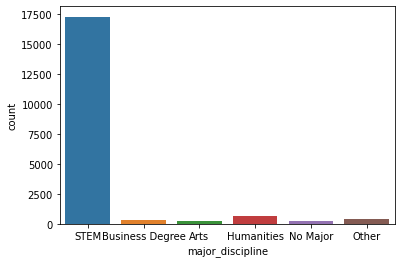

In [ ]:
trainset['major_discipline']=trainset['major_discipline'].fillna('STEM')
testset['major_discipline']=testset['major_discipline'].fillna('STEM')

ax = sns.countplot(x="major_discipline", data=trainset)

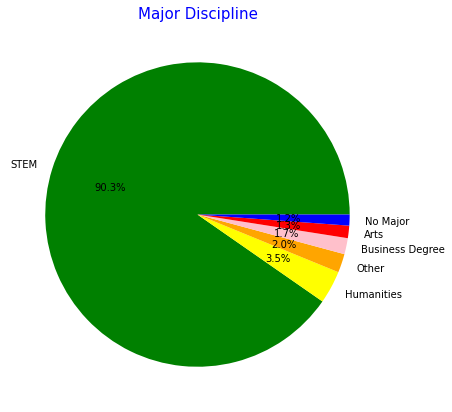

In [ ]:
labels = trainset.major_discipline.value_counts().index
colors = ['green','yellow','orange','pink','red','blue']
explode = [0,0,0,0,0,0]
sizes = trainset.major_discipline.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Major Discipline',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
trainset= pd.get_dummies(trainset,columns=['major_discipline'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['major_discipline'], prefix_sep='_', drop_first=True)
trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,0.920,0,0,2,>20,2,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.776,1,0,2,15,2,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,0.624,1,2,2,5,3,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


experience column

In [ ]:
trainset['experience'].isnull().sum()

65

In [ ]:
testset['experience'].isnull().sum()

5

In [ ]:
trainset.value_counts('experience')

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
dtype: int64

In [ ]:
testset.value_counts('experience')

experience
>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
dtype: int64

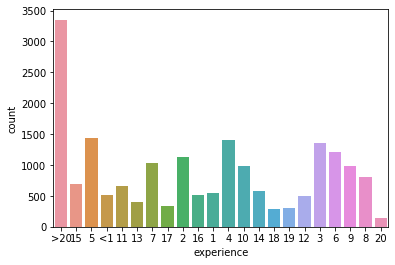

In [ ]:
trainset['experience']=trainset['experience'].fillna('>20')
testset['experience']=testset['experience'].fillna('>20')

ax = sns.countplot(x="experience", data=trainset)

In [ ]:
 trainset['experience']=trainset['experience'].map({'<1':0, '>20':21,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20})
 testset['experience']=testset['experience'].map({'<1':0, '>20':21,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20})
 trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,0.920,0,0,2,21,2,NaN,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.776,1,0,2,15,2,Pvt Ltd,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,0.624,1,2,2,5,3,NaN,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


company_type column

In [ ]:
trainset['company_type'].isnull().sum()

6140

In [ ]:
testset['company_type'].isnull().sum()

634

In [ ]:
trainset.value_counts('company_type')

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
dtype: int64

In [ ]:
testset.value_counts('company_type')

company_type
Pvt Ltd                1141
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
dtype: int64

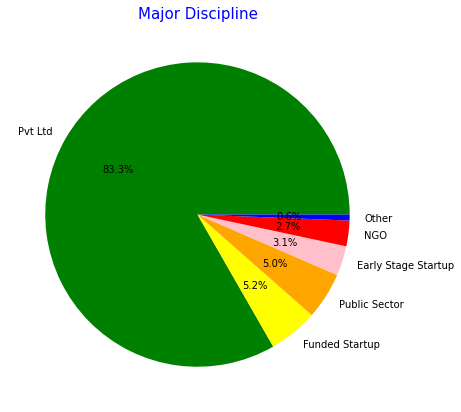

In [ ]:
trainset['company_type'] = trainset['company_type'].fillna('Pvt Ltd')
testset['company_type'] = testset['company_type'].fillna('Pvt Ltd')

labels = trainset.company_type.value_counts().index
colors = ['green','yellow','orange','pink','red','blue']
explode = [0,0,0,0,0,0]
sizes = trainset.company_type.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Major Discipline',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
trainset= pd.get_dummies(trainset,columns=['company_type'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['company_type'], prefix_sep='_', drop_first=True)
trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,0,0,2,21,2,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0.776,1,0,2,15,2,>4,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
2,0.624,1,2,2,5,3,never,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


last_new_job column

In [ ]:
trainset['last_new_job'].isnull().sum()

423

In [ ]:
testset['last_new_job'].isnull().sum()

40

In [ ]:
trainset.value_counts('last_new_job')

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
dtype: int64

In [ ]:
testset.value_counts('last_new_job')

last_new_job
1        884
>4       353
2        342
never    258
3        133
4        119
dtype: int64

In [ ]:
trainset['last_new_job'] = trainset['last_new_job'].fillna('1')
testset['last_new_job'] = testset['last_new_job'].fillna('1')

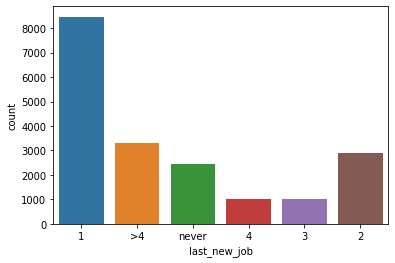

In [ ]:
ax = sns.countplot(x="last_new_job", data=trainset)

In [ ]:
trainset['last_new_job']=trainset['last_new_job'].map({'1':1,'2': 2,'3': 3,'4': 4,'>4': 5,'never': 0})
testset['last_new_job']=testset['last_new_job'].map({'1':1,'2': 2,'3': 3,'4': 4,'>4': 5,'never': 0})
trainset.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,city_102,city_103,city_104,city_11,city_114,city_136,city_16,city_160,city_21,city_23,city_28,city_36,city_61,city_65,city_67,city_71,city_73,city_75,city_90,city_other,gender_Male,gender_Other,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,0,0,2,21,2,1,36,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0.776,1,0,2,15,2,5,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
2,0.624,1,2,2,5,3,0,83,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


training_hours column

In [ ]:
trainset['training_hours'].isnull().sum()

0

In [ ]:
trainset.value_counts('training_hours')

training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
276      6
272      5
286      5
234      5
238      4
Length: 241, dtype: int64

Splitting

In [ ]:
trainset.columns.get_loc('target')

8

In [ ]:
trainset.shape

(19158, 41)

In [ ]:
X = trainset.drop(['target'],axis=1).values
y=trainset['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

Feature Importance

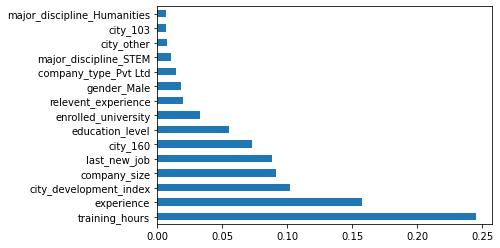

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=testset.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()
#had to use testset.column because X.columns was giving np error. Could use testset because testset and X_train have the same columns.

Applying feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(y_pred)

[0. 0. 0. ... 1. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)  

[[2663  219]
 [ 629  321]]


0.778705636743215

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2882
         1.0       0.59      0.34      0.43       950

    accuracy                           0.78      3832
   macro avg       0.70      0.63      0.65      3832
weighted avg       0.76      0.78      0.76      3832



In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [1. 0.]]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test, y_pred)
print(auc_train)

0.6309529201212608


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X =X_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 77.68 %
Standard Deviation: 1.14 %


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(criterion='entropy')
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred1=classifier1.predict(X_test)

In [ ]:
print(y_pred1)

[1. 0. 0. ... 1. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)
accuracy_score(y_test,y_pred1)

[[2286  596]
 [ 584  366]]


0.6920668058455115

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      2882
         1.0       0.38      0.39      0.38       950

    accuracy                           0.69      3832
   macro avg       0.59      0.59      0.59      3832
weighted avg       0.69      0.69      0.69      3832



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test, y_pred1)
print(auc_train)

0.5892311625698529


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X =X_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 69.50 %
Standard Deviation: 1.03 %


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred2=classifier2.predict(X_test)

In [ ]:
print(y_pred2)

[0. 0. 0. ... 1. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
accuracy_score(y_test,y_pred2)

[[2617  265]
 [ 679  271]]


0.7536534446764092

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85      2882
         1.0       0.51      0.29      0.36       950

    accuracy                           0.75      3832
   macro avg       0.65      0.60      0.61      3832
weighted avg       0.72      0.75      0.73      3832



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test, y_pred2)
print(auc_train)

0.5966565615983053


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X =X_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 75.03 %
Standard Deviation: 0.84 %


XGB Classifier

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred3 = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)
accuracy_score(y_test,y_pred3)

[[2609  273]
 [ 580  370]]


0.7774008350730689

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test, y_pred3)
print(auc_train)

0.6473738997041528


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      2882
         1.0       0.58      0.39      0.46       950

    accuracy                           0.78      3832
   macro avg       0.70      0.65      0.66      3832
weighted avg       0.76      0.78      0.76      3832



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X =X_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 78.07 %
Standard Deviation: 1.22 %


SVC

In [ ]:
from sklearn.svm import SVC
classifier4=SVC(kernel='rbf')
classifier4.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred4 = classifier4.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)
accuracy_score(y_test,y_pred4)

[[2658  224]
 [ 612  338]]


0.7818371607515657

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2882
         1.0       0.60      0.36      0.45       950

    accuracy                           0.78      3832
   macro avg       0.71      0.64      0.66      3832
weighted avg       0.76      0.78      0.76      3832



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test, y_pred4)
print(auc_train)

0.6390328353847841


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X =X_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 77.72 %
Standard Deviation: 1.11 %


Catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier as cb

classifier5 = cb(silent=True)
classifier5.fit(X_train,y_train)
y_pred5 = classifier5.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5=confusion_matrix(y_test,y_pred5)
print(cm5)
accuracy_score(y_test,y_pred5)

[[2597  285]
 [ 597  353]]


0.7698329853862212

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2882
         1.0       0.55      0.37      0.44       950

    accuracy                           0.77      3832
   macro avg       0.68      0.64      0.65      3832
weighted avg       0.75      0.77      0.75      3832



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test, y_pred5)
print(auc_train)

0.6363446437050294


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X =X_train, y = y_train, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 77.83 %
Standard Deviation: 1.19 %


Now we have tried out all these different classification models and from the confusion matrices and the classification reports we can see that the dataset is unbalanced as the classes dont have an even distribution.

Handling imbalanced data by Oversampling using SMOTE algorithm

In [ ]:
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_1, y_1 = sm.fit_sample(X_train, y_train)
print("After OverSampling, counts of label '1' in y_1: {}".format(sum(y_1 == 1))) 
print("After OverSampling, counts of label '0' in y_1: {}".format(sum(y_1 == 0)))

Before OverSampling, counts of label '1' in training set: 3827
Before OverSampling, counts of label '0' in training set: 11499 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '1' in y_1: 11499
After OverSampling, counts of label '0' in y_1: 11499


In [ ]:
X_train.shape

(15326, 40)

In [ ]:
X_1.shape

(22998, 40)

Splitting the balanced data now

In [ ]:
from sklearn.model_selection import train_test_split 
X_train1,X_test1,y_train1,y_test1=train_test_split(X_1,y_1,test_size=0.20,random_state=0)

In [ ]:
X_train1.shape

(18398, 40)

In [ ]:
X_test1.shape

(4600, 40)

Training oversampled,balanced data with Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test1,y_pred)
print(cm)
accuracy_score(y_test1,y_pred)  

[[1755  588]
 [ 829 1428]]


0.6919565217391305

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71      2343
         1.0       0.71      0.63      0.67      2257

    accuracy                           0.69      4600
   macro avg       0.69      0.69      0.69      4600
weighted avg       0.69      0.69      0.69      4600



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test1, y_pred)
print(auc_train)

0.6908689823720993


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X =X_train1, y = y_train1, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 70.15 %
Standard Deviation: 1.31 %


Training oversampled,balanced data with XGBClassifier

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred3 = clf.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3=confusion_matrix(y_test1,y_pred3)
print(cm3)
accuracy_score(y_test1,y_pred3)

[[1992  351]
 [ 524 1733]]


0.8097826086956522

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test1, y_pred3)
print(auc_train)

0.8090127343186682


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test1,y_pred3))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      2343
         1.0       0.83      0.77      0.80      2257

    accuracy                           0.81      4600
   macro avg       0.81      0.81      0.81      4600
weighted avg       0.81      0.81      0.81      4600



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X =X_train1, y = y_train1, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 81.71 %
Standard Deviation: 0.67 %


Catboost

In [ ]:
classifier5 = cb(silent=True)
classifier5.fit(X_train1,y_train1)
y_pred5 = classifier5.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5=confusion_matrix(y_test1,y_pred5)
print(cm5)
accuracy_score(y_test1,y_pred5)

[[2056  287]
 [ 419 1838]]


0.8465217391304348

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test1,y_pred5))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      2343
         1.0       0.86      0.81      0.84      2257

    accuracy                           0.85      4600
   macro avg       0.85      0.85      0.85      4600
weighted avg       0.85      0.85      0.85      4600



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test1, y_pred5)
print(auc_train)

0.8459314040011338


In [150]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X =X_train1, y = y_train1, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 84.80 %
Standard Deviation: 0.72 %


Now we try to balance imbalanced data using undersampling by using NearMiss algorithm

In [151]:
print("Before Undersampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 
  
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_2, y_2 = nr.fit_sample(X_train, y_train)

print("After Undersampling, counts of label '1' in y_2: {}".format(sum(y_2 == 1))) 
print("After Undersampling, counts of label '0' in y_2: {}".format(sum(y_2 == 0)))

Before Undersampling, counts of label '1' in training set: 3827
Before Undersampling, counts of label '0' in training set: 11499 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, counts of label '1' in y_2: 3827
After Undersampling, counts of label '0' in y_2: 3827


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Splitting the undersampled, balanced data now

In [152]:
from sklearn.model_selection import train_test_split 
X_train2,X_test2,y_train2,y_test2=train_test_split(X_2,y_2,test_size=0.20,random_state=0)

In [153]:
X_2.shape

(7654, 40)

In [154]:
X_train2.shape  

(6123, 40)

In [155]:
X_test2.shape

(1531, 40)

Training undersampled,balanced data with Logistic Regression Model

In [156]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
y_pred=classifier.predict(X_test2)

In [158]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test2,y_pred)
print(cm)
accuracy_score(y_test2,y_pred)  

[[562 212]
 [264 493]]


0.6890920966688439

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       774
         1.0       0.70      0.65      0.67       757

    accuracy                           0.69      1531
   macro avg       0.69      0.69      0.69      1531
weighted avg       0.69      0.69      0.69      1531



Training undersampled,balanced data with XGBClassifier

In [160]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [161]:
y_pred3 = clf.predict(X_test2)

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3=confusion_matrix(y_test2,y_pred3)
print(cm3)
accuracy_score(y_test2,y_pred3)

[[530 244]
 [186 571]]


0.7191378184193338

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test2,y_pred3))

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       774
         1.0       0.70      0.75      0.73       757

    accuracy                           0.72      1531
   macro avg       0.72      0.72      0.72      1531
weighted avg       0.72      0.72      0.72      1531



In [164]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test2, y_pred3)
print(auc_train)

0.7195238924218065


In [165]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X =X_train2, y = y_train2, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 72.71 %
Standard Deviation: 1.12 %


Catboost

In [166]:
classifier5 = cb(silent=True)
classifier5.fit(X_train2,y_train2)
y_pred5 = classifier5.predict(X_test2)

In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5=confusion_matrix(y_test2,y_pred5)
print(cm5)
accuracy_score(y_test2,y_pred5)

[[545 229]
 [185 572]]


0.7295885042455911

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test2,y_pred5))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       774
         1.0       0.71      0.76      0.73       757

    accuracy                           0.73      1531
   macro avg       0.73      0.73      0.73      1531
weighted avg       0.73      0.73      0.73      1531



In [169]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_train = roc_auc_score(y_test2, y_pred5)
print(auc_train)

0.7298743168839326


In [170]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X =X_train2, y = y_train2, cv = 10)
print('Cross Validation')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation
Accuracy: 72.81 %
Standard Deviation: 1.39 %


Testset

In [171]:
y_submission = classifier4.predict(testset)

In [173]:
result_data = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'enrollee_id': result_data.enrollee_id, 'target': y_submission})
output.to_csv('my_submission.csv', index=False)